In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df_merged = pd.read_csv('../data/cenus_epa_climate_theil_merged.csv')
df_urban = df_merged.loc[df_merged['pop_density'] >= 500]
df_urban = df_urban.reset_index(drop=True)

In [119]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49929 entries, 0 to 49928
Columns: 118 entries, ID to theil_industry_tot
dtypes: float64(113), int64(1), object(4)
memory usage: 44.9+ MB


In [111]:
len(df_urban[df_urban['theil_income_tot'].isnull()])

1123

In [118]:
len(df_urban[df_urban['theil_pop_black'].isnull()])


1492

In [117]:
len(df_urban[df_urban['theil_pop_asian'].isnull()])

4844

In [24]:
for i in df.columns: 
    print(i)

Unnamed: 0
NAME
pop_tot
pop_white_only
pop_black_only
pop_amInd_alNat_only
pop_asian_only
pop_natHI_PI_only
pop_white
pop_black
pop_amInd_alNat
pop_asian
pop_natHI_PI
pop_hispanic_latino_any
poverty_tot_white_only
poverty_tot_black_only
poverty_tot_amInd_alNat_only
poverty_tot_asian_only
poverty_tot_natHI_PI_only
poverty_tot_hispanic_latino_any
poverty_below_white_only
poverty_below_black_only
poverty_below_amInd_alNat_only
poverty_below_asian_only
poverty_below_natHI_PI_only
poverty_below_hispanic_latino_any
poverty_below_white_only.1
poverty_perc_black_only
poverty_perc_amInd_alNat_only
poverty_perc_asian_only
poverty_perc_natHI_PI_only
poverty_perc_hispanic_latino_any
industry_tot
industry_ag_for
industry_const
industry_manu
industry_wtrade
industry_rtrade
industry_transp
industry_info
industry_fin
industry_prof
industry_ed_hc
industry_arts_ent
industry_other
industry_pub_admin
income_tot
income_under10k
income_10to15k
income_15to25k
income_25to35k
income_35to50k
income_50to75k
inco

In [69]:
# Calculate the Theil Index 
def calc_theil(df, char_str):
    '''
    Calculates the generalized entropy index of given agents with an associated characteristic 
    
    Inputs: 
    df - data frame containing population and characteristic data, NEEDS TO BE FOR ENTIRE COUNTRY
    char_str - string, characteristic wanting to be measured (income, race, etc)
    '''
    
    i = df[char_str]
    N = len(i)
    
    xi = df[char_str]
    mu = xi.mean()
    
    # calculate the Theil L index contributions which are more sensitive to changes in the lower end of the distribution than Theil T
    TL_contr = (1/N)*np.log(mu/xi)
    
    # drop characteristics that are 0
    TL_contr[xi == 0] = np.nan
    
    name = 'theil_' + char_str
    
    if name in df:
        print('This column already exists. Recalculating.')
        df = df.drop(columns=[name])
        
    df[name] = TL_contr
    

In [70]:
# Add some Theil contributions for some common variables

In [103]:
calc_theil(df_merged,'income_tot')

In [104]:
calc_theil(df_merged, 'pop_black')

In [105]:
calc_theil(df_merged, 'pop_asian')

In [106]:
calc_theil(df_merged, 'industry_tot')

In [107]:
df_merged.to_csv('../data/cenus_epa_climate_theil_merged.csv', index=False)

In [108]:
df_merged

,ID,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg,pop_density,theil_income_tot,theil_pop_black,theil_pop_asian,theil_industry_tot
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,182.284436,1.028894e-05,0.000012,0.000021,1.074178e-05
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,605.272556,1.046329e-05,-0.000009,0.000018,8.403355e-06
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,668.689248,1.001813e-06,-0.000008,0.000008,2.348154e-07
3,1001020400,"Census Tract 204, Autauga County, Alabama",3802.0,3410.0,251.0,18.0,14.0,0.0,3519.0,268.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,595.525072,-1.066334e-06,0.000009,0.000024,3.642122e-07
4,1001020501,"Census Tract 205.01, Autauga County, Alabama",4381.0,3323.0,976.0,0.0,28.0,0.0,3348.0,1005.0,...,NaN,NaN,NaN,NaN,NaN,706.196703,-2.329993e-06,-0.000007,0.000026,-3.269960e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85390,72153750501,"Census Tract 7505.01, Yauco Municipio, Puerto ...",4757.0,3512.0,70.0,0.0,0.0,0.0,3937.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.649480e-06,0.000022,NaN,9.443450e-07
85391,72153750502,"Census Tract 7505.02, Yauco Municipio, Puerto ...",2871.0,1911.0,217.0,35.0,0.0,0.0,2060.0,217.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.898769e-06,0.000011,NaN,1.155873e-05
85392,72153750503,"Census Tract 7505.03, Yauco Municipio, Puerto ...",2010.0,1490.0,21.0,0.0,0.0,0.0,1592.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.799372e-06,0.000031,NaN,1.520151e-05
85393,72153750601,"Census Tract 7506.01, Yauco Municipio, Puerto ...",4927.0,3197.0,442.0,0.0,0.0,0.0,3647.0,451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.403215e-08,0.000002,NaN,2.107719e-06


In [ ]:
# Run some checks 

In [97]:
df_urban = df_merged.loc[df_merged['pop_density'] >= 500]
df_urban = df_urban.reset_index(drop=True)

In [98]:
df_urban

,ID,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg,pop_density,theil_income_tot,theil_pop_black,theil_pop_asian,theil_industry_tot
0,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,605.272556,0.000010,-0.000009,0.000018,8.403355e-06
1,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,668.689248,0.000001,-0.000008,0.000008,2.348154e-07
2,1001020400,"Census Tract 204, Autauga County, Alabama",3802.0,3410.0,251.0,18.0,14.0,0.0,3519.0,268.0,...,11.801866,26.030747,39.215973,52.425672,63.559917,595.525072,-0.000001,0.000009,0.000024,3.642122e-07
3,1001020501,"Census Tract 205.01, Autauga County, Alabama",4381.0,3323.0,976.0,0.0,28.0,0.0,3348.0,1005.0,...,NaN,NaN,NaN,NaN,NaN,706.196703,-0.000002,-0.000007,0.000026,-3.269960e-06
4,1001020502,"Census Tract 205.02, Autauga County, Alabama",3328.0,2673.0,166.0,0.0,373.0,0.0,2732.0,166.0,...,NaN,NaN,NaN,NaN,NaN,1586.733988,0.000002,0.000014,-0.000006,4.338277e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49924,56033000400,"Census Tract 4, Sheridan County, Wyoming",5489.0,5233.0,0.0,8.0,12.0,0.0,5408.0,69.0,...,4.014716,11.349566,19.377176,33.097183,41.981195,886.002230,-0.000006,0.000024,0.000021,-4.577464e-06
49925,56037970602,"Census Tract 9706.02, Sweetwater County, Wyoming",3364.0,2777.0,0.0,194.0,14.0,0.0,3096.0,0.0,...,1.609278,6.331813,10.679828,20.037767,27.951797,2246.007228,0.000005,NaN,0.000014,2.632724e-06
49926,56037970902,"Census Tract 9709.02, Sweetwater County, Wyoming",5348.0,4491.0,209.0,52.0,77.0,0.0,4813.0,257.0,...,2.539311,8.102764,12.637384,22.608638,30.927471,735.764511,-0.000002,0.000009,0.000005,-4.195903e-06
49927,56039967801,"Census Tract 9678.01, Teton County, Wyoming",3134.0,2462.0,0.0,0.0,104.0,0.0,2514.0,0.0,...,NaN,NaN,NaN,NaN,NaN,501.253614,0.000002,NaN,0.000007,-2.753102e-06


In [89]:
tl = df_merged['theil_tot_pop']

In [90]:
tl.max()

6.316235461917794e-05

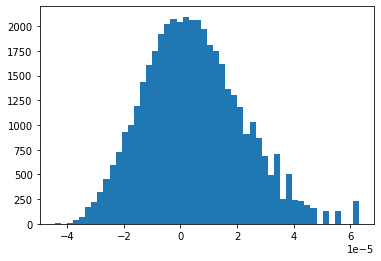

In [91]:
plt.hist(tl[tl>-90],bins=50)
#plt.hist(tl,bins=50)
plt.show()

In [87]:
tl[tl == tl.max()]

36673    0.000077
Name: theil_income_tot, dtype: float64

In [88]:
df_merged.iloc[36673]

ID                                                   39101010202
NAME                    Census Tract 102.02, Marion County, Ohio
pop_tot                                                   4864.0
pop_white_only                                            2324.0
pop_black_only                                            1985.0
                                          ...                   
pop_density                                           907.171241
theil_income_tot                                        0.000077
theil_pop_black_only                                   -0.000016
theil_pop_asian_only                                    0.000028
theil_industry_tot                                       0.00008
Name: 36673, Length: 118, dtype: object

In [99]:
tl_black = df_merged['theil_pop_black']
tl_income = df_merged['theil_income_tot']